<a href="https://colab.research.google.com/github/sunilneupane27/week9/blob/main/week6_pf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
df = pd.read_csv('/content/diabetesN (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df.info()
# Prepare data for clustering, excluding the 'Outcome' column
X = df.drop('Outcome', axis=1)

import numpy as np
data=np.array(X)
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
# same thing using index location
xx = df.iloc[:,[3,5]]
xx

,SkinThickness,BMI
0,35,33.6
1,29,26.6
2,0,23.3
3,23,28.1
4,35,43.1
...,...,...
763,48,32.9
764,27,36.8
765,23,26.2
766,0,30.1


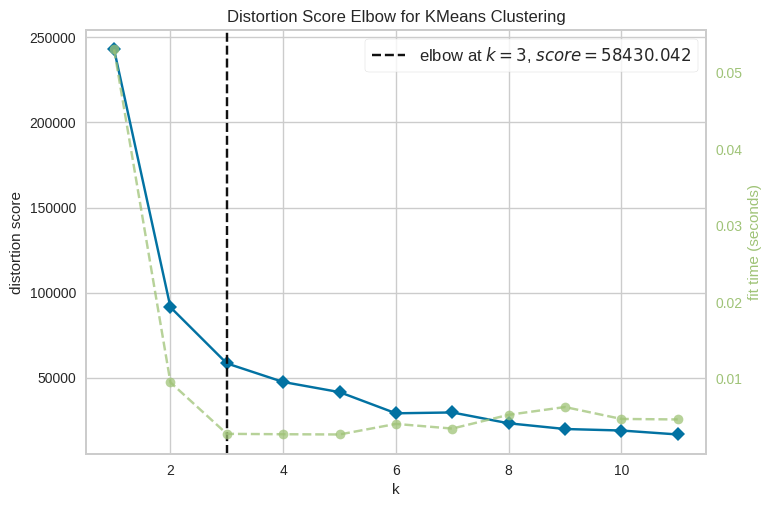

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(xx)
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(xx)

In [ ]:
kmeans.labels_

array([1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1,
       2, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2,
       1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1,
       2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2,

In [ ]:
#We assign the labels to each row in dataframe.
df["Clus_km"] = kmeans.labels_
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Clus_km
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
5,5,116,74,0,0,25.6,0.201,30,0,2
6,3,78,50,32,88,31.0,0.248,26,1,1
7,10,115,0,0,0,35.3,0.134,29,0,2
8,2,197,70,45,543,30.5,0.158,53,1,1
9,8,125,96,0,0,0.0,0.232,54,1,2


In [ ]:
kmeans.cluster_centers_

array([[22.33214286, 28.44392857],
       [37.7751004 , 37.94819277],
       [ 0.47280335, 29.94518828]])

In [ ]:
#Get each cluster size,
from collections import Counter
Counter(kmeans.labels_)

Counter({np.int32(1): 249, np.int32(0): 280, np.int32(2): 239})

In [ ]:
from sklearn import metrics
clusters = kmeans.labels_.tolist()

ClusterCentroid=kmeans.cluster_centers_
clustervalidation=metrics.silhouette_score(xx,clusters, metric='euclidean')
print(clustervalidation)

0.47187846702602904


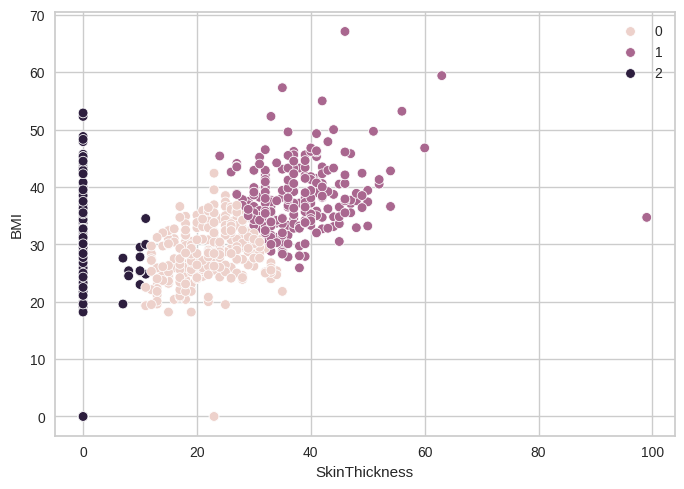

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=xx, x="SkinThickness", y="BMI", hue=kmeans.labels_)
plt.show()

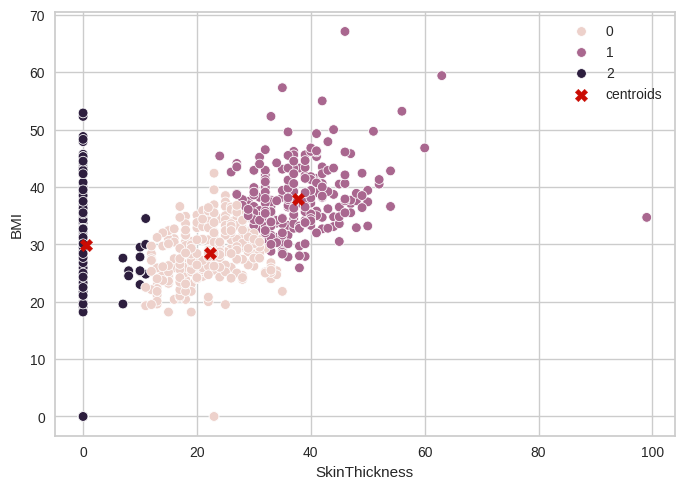

In [ ]:
sns.scatterplot(data=xx, x="SkinThickness", y="BMI", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
newdata=[[85.89,30400],[10,10000],[15,1700],[3,6000]]
d=pd.DataFrame(newdata,columns=['SkinThickness','BMI'])
#d=[[15,1700]]
predictedClusters=kmeans.predict(d)
print(len(predictedClusters))
print(d)
print(predictedClusters)

4
   SkinThickness    BMI
0          85.89  30400
1          10.00  10000
2          15.00   1700
3           3.00   6000
[1 1 1 1]
